In [660]:
import pandas as pd
import numpy as np

In [661]:
df_main = pd.read_csv('data/train.csv', encoding='utf8')
df_test = pd.read_csv('data/test.csv', encoding='utf8')
df_sample_final = pd.read_csv('data/sample_submission.csv', encoding='utf8')

In [662]:
df = df_main.copy()

In [663]:
# First look on data
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [664]:
# Dataset shape
df.shape

(74051, 10)

In [665]:
# Get fimiliar with Dtypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [666]:
# Find out any Null values
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [667]:
# Get fimiliar with dataset outliers and varaibles range
df.describe(include='all')

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,27084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37025.000000,NaN,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,NaN,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,NaN,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,NaN,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,NaN,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000


## Variable Handling and feature_engineering

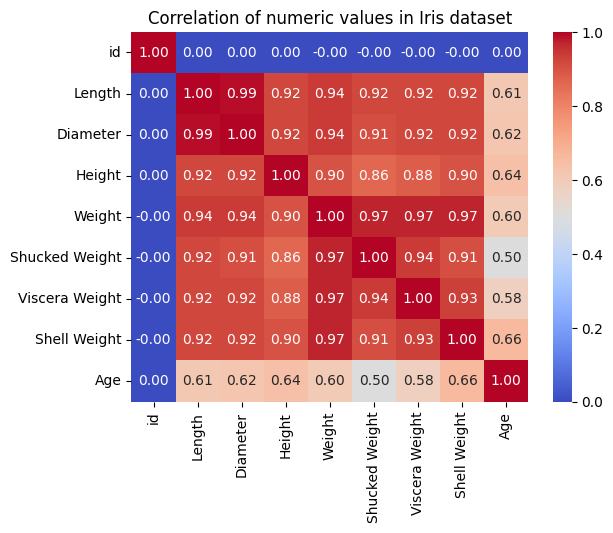

In [668]:
# Base corelation without feature engineering.

import seaborn as sns

corr = df.corr(numeric_only=True)
corr = corr.round(2)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

plt.title('Correlation of numeric values in Iris dataset')

plt.savefig('Correlogram_sns.png')

In [669]:
# Handle Sex Variable
df.groupby('Sex')['Age'].median()

Sex
F    11.0
I     7.0
M    10.0
Name: Age, dtype: float64

In [670]:
dict_sex = {
    'M': 7,
    'I': 11,
    'F': 11
             }

df['Sex'] = df['Sex'].map(dict_sex)
df_test['Sex'] = df_test['Sex'].map(dict_sex)

In [725]:
df.corr()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.002921,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Sex,0.002921,1.000000,-0.301459,-0.303113,-0.289869,-0.290705,-0.285511,-0.285610,-0.284606,-0.221978
Length,0.000165,-0.301459,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,-0.303113,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,-0.289869,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,-0.290705,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,-0.285511,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,-0.285610,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,-0.284606,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,-0.221978,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


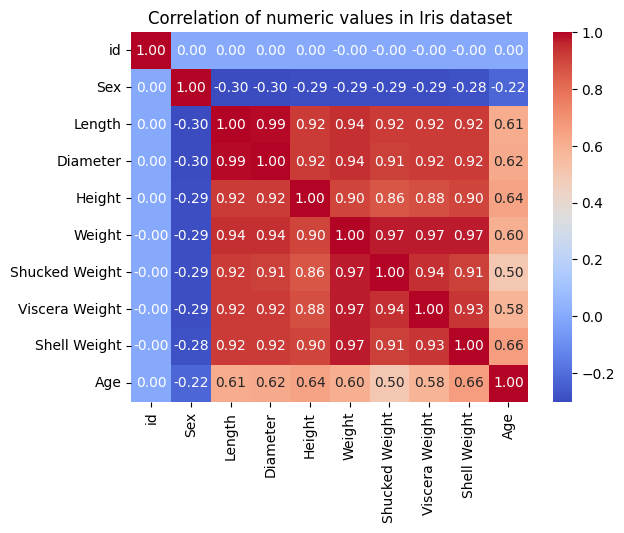

In [671]:
import seaborn as sns

corr = df.corr()
corr = corr.round(2)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

plt.title('Correlation of numeric values in Iris dataset')

plt.savefig('Correlogram_sns.png')

In [672]:
df.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,9.537008,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,1.926570,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,7.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,7.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,11.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,11.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,11.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


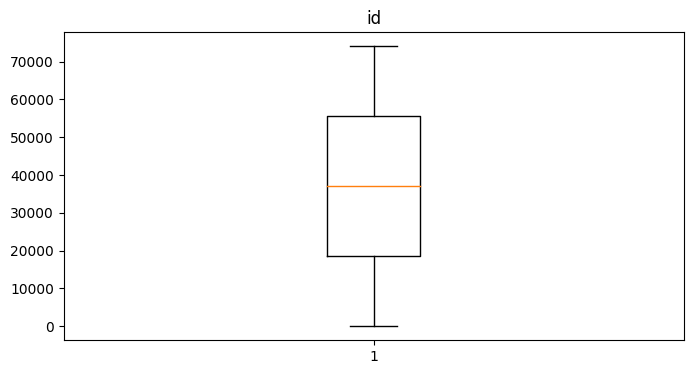

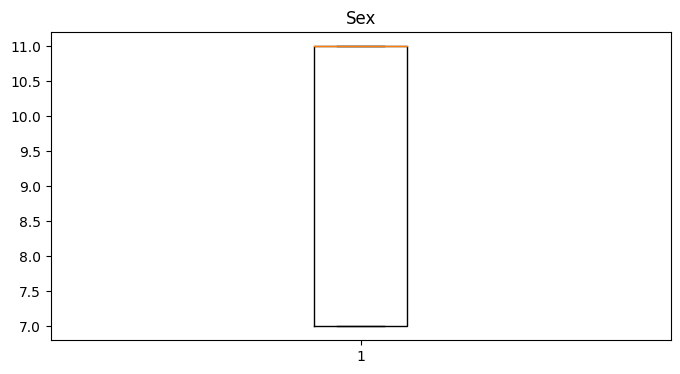

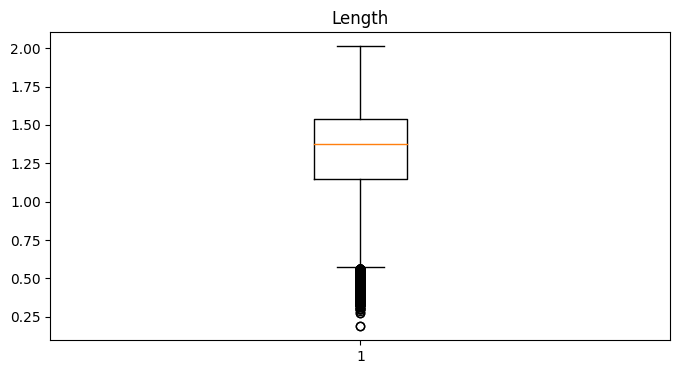

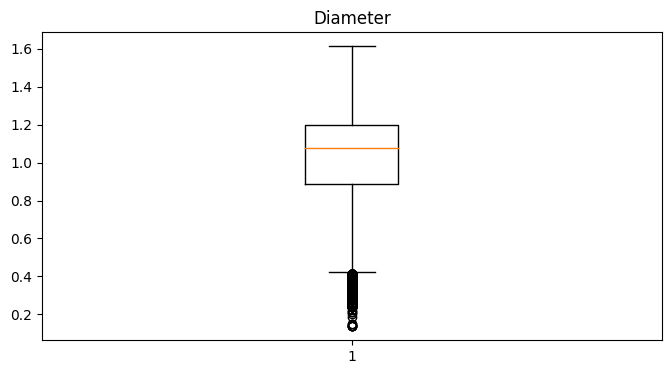

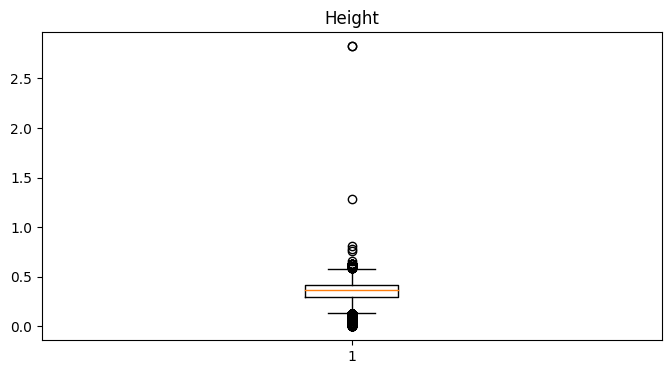

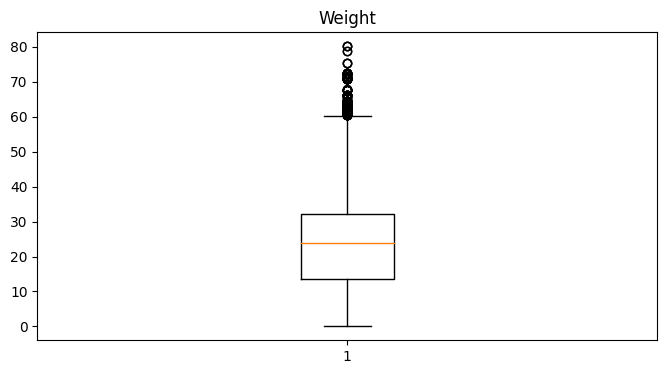

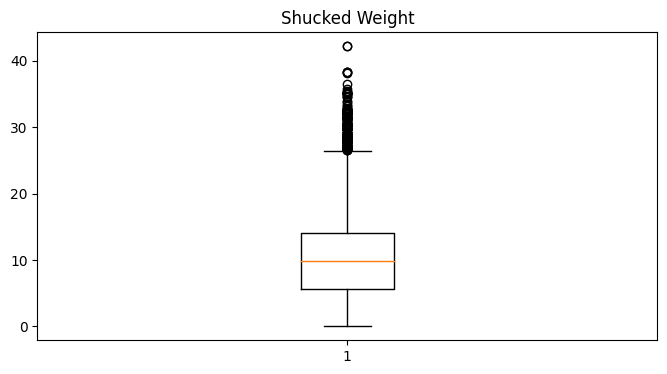

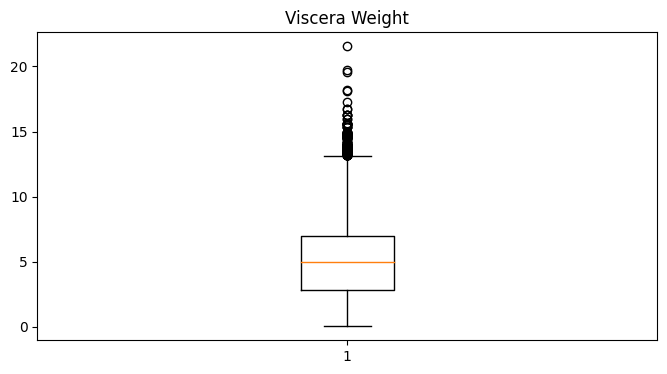

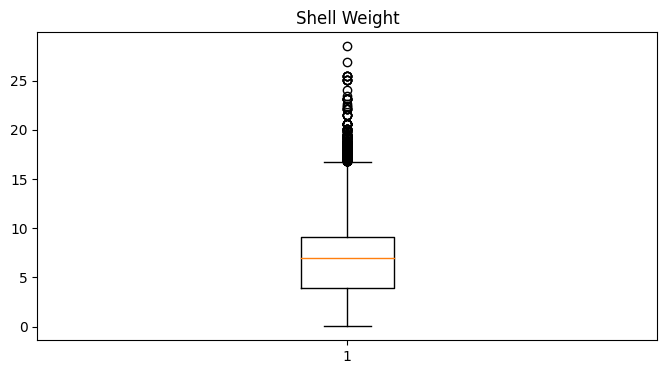

In [673]:
import pandas as pd
import matplotlib.pyplot as plt

# Chosing the columns for withch to plot outliers 
columns_to_plot = df_test.columns

# Box-plot creation for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Size of plot
    plt.boxplot(df[column].dropna())  # Boxpltot
    plt.title(column)  # Title of plot
    plt.show()

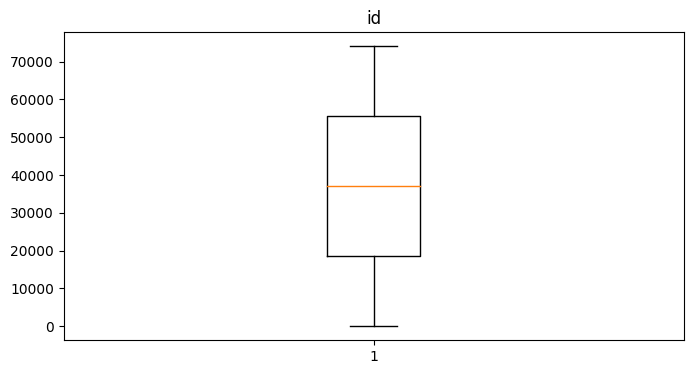

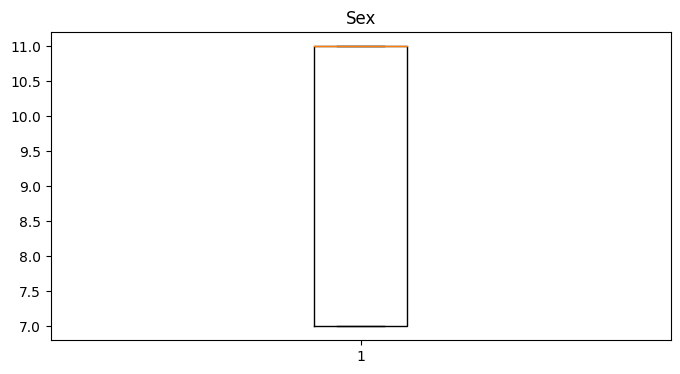

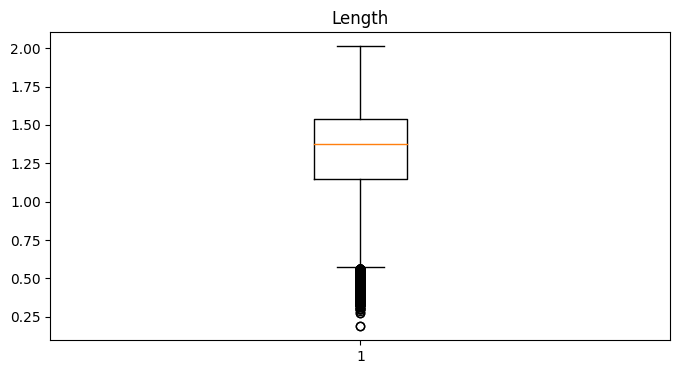

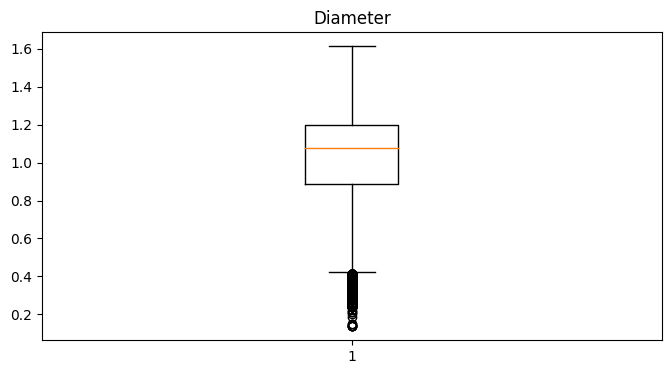

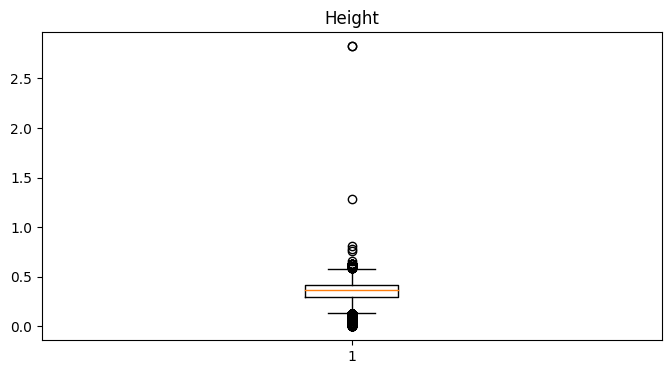

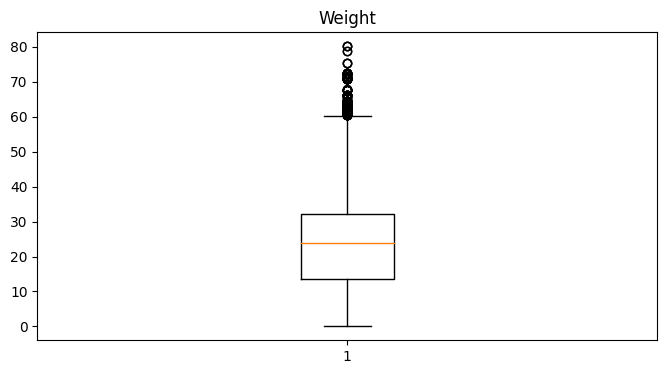

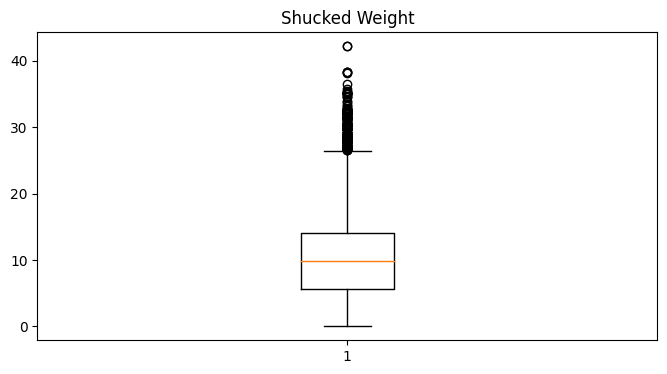

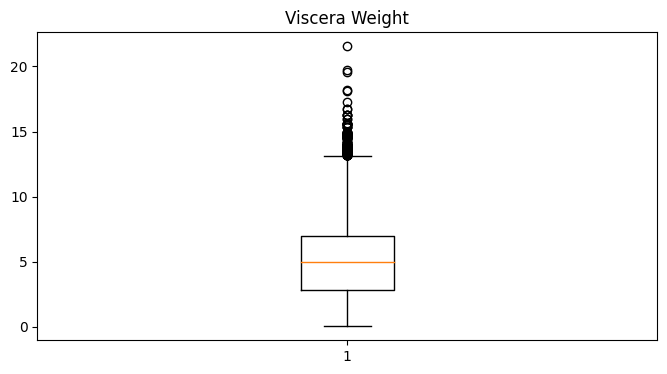

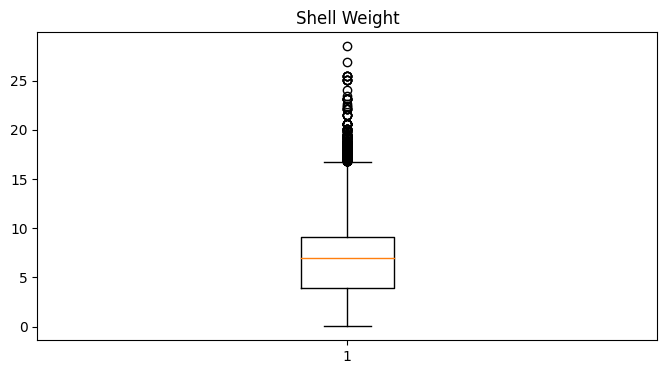

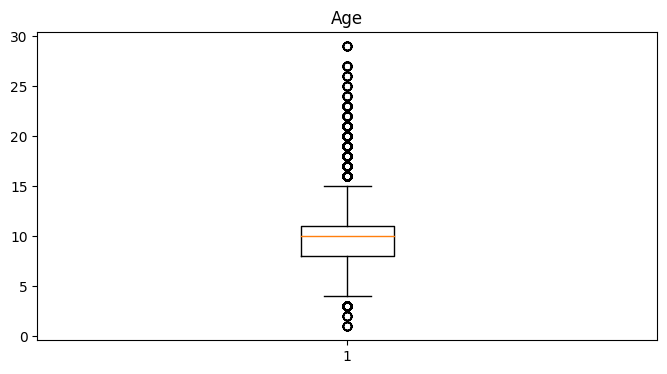

In [674]:
import pandas as pd
import matplotlib.pyplot as plt

# Chosing the columns for withch to plot outliers 
columns_to_plot = df.columns

# Box-plot creation for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Size of plot
    plt.boxplot(df[column].dropna())  # Boxpltot
    plt.title(column)  # Title of plot
    plt.show()

In [675]:
df_test.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,9.547804,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,1.923535,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,7.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,7.000000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,11.000000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,11.000000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,11.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [676]:
df.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,9.537008,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,1.926570,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,7.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,7.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,11.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,11.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,11.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [677]:
df.shape

(74051, 10)

In [734]:
df.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,9.537008,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,1.926570,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,7.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,7.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,11.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,11.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,11.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [727]:
# DIAMETER / LENGTH

In [728]:
id_length_outliers = df[df['Length'] < 0.75]['id']

In [737]:
df[df['Length'] < 0.75]['Age'].mean()

5.100291082296904

In [730]:
df[df['Length'] < 0.75]['Age']

19       5
29       6
38       4
61       3
66       4
        ..
73913    5
73952    3
73988    6
74008    4
74026    5
Name: Age, Length: 3779, dtype: int64

In [732]:
id_diameter_outlers = df[df['Diameter'] < 0.6]['id']

In [738]:
df[df['Diameter'] < 0.6]['Age'].mean()

5.3166089965397925

In [681]:
df['Age'].mean()

9.967805971560141

In [ ]:
id_

In [746]:
print(len(id_length_outliers))
print(len(id_diameter_outlers))
print(len(set(id_diameter_outlers + id_length_outliers)))
print(len(np.intersect1d(id_diameter_outlers, id_length_outliers)))

3779
4624
4636
3767


In [682]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [683]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [684]:
sub = pd.DataFrame()
sub['id'] = df_test['id']

In [685]:
X = df[['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]
y = df['Age']

df_test.drop(labels=['id'], axis=1, inplace=True)

In [686]:
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

In [687]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,11,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,11,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,7,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,11,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,11,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [722]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [723]:
# ## From Rndomizer Search without old column: 

# model = RandomForestRegressor(
#     n_estimators=500,
#     min_samples_leaf=40,
#     min_samples_split=50,
#     max_features='sqrt',
#     max_depth=40)

# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# print('R2 train: ', r2_score(y_train, y_pred_train))

# y_pred = model.predict(X_test)
# print('R2: ', r2_score(y_test, y_pred))

In [747]:
model = RandomForestRegressor(
    n_estimators=300,
    min_samples_leaf=7,
    min_samples_split=7,
    max_features='sqrt',
    max_depth=15)

model.fit(X_train, y_train)

y_pred_final = model.predict(df_test)

In [724]:
# Define the parameter grid for grid search
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(1, 70, 7),
    'min_samples_leaf': (1, 70, 7),
    'min_samples_split':(1, 70, 7),
    'max_features': ['sqrt', 'log2']}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Create the randomized search object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_iter=10)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_rf = random_search.best_estimator_
print('Best Params: ', random_search.best_params_)

# Fit the best estimator on the training data
best_rf.fit(X_train, y_train)

# Predict on the training and test data using the best estimator
y_pred_train = best_rf.predict(X_train)
y_pred = best_rf.predict(X_test)

# Calculate the evaluation metrics

# Training set
print('Training Set Metrics:')
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train))
print('R2:', r2_score(y_train, y_pred_train))

# Test set
print('Test Set Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11

Best Params:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 43}
Training Set Metrics:
MAE: 1.193831173161713
RMSE: 3.0384914851151694
R2: 0.6977297908109934
Test Set Metrics:
MAE: 1.4355099469526462
RMSE: 4.27577822870521
R2: 0.5795691959939555


In [692]:

# # Create the Random Forest classifier
# rf = RandomForestRegressor(
#     n_estimators=300,
#     min_samples_leaf=10,
#     min_samples_split=20,
#     max_features='sqrt',
#     max_depth=20
#                           ) # r2_ 59

# # Create the randomized search obje

# # Predict on the training and test data using the best estimator
# y_pred_final = best_rf.predict(df_test)

In [748]:
model.feature_importances_
pd.DataFrame(model.feature_importances_, X.columns,)

,0
Sex,0.010141
Length,0.070766
Diameter,0.075112
Height,0.161102
Weight,0.156937
Shucked Weight,0.123296
Viscera Weight,0.112879
Shell Weight,0.289767


## Submission Creation

In [749]:
sub['Age'] = pd.DataFrame(y_pred_final)

In [750]:
sub.head()

,id,Age
0,74051,7.719549
1,74052,7.844590
2,74053,10.159918
3,74054,9.905585
4,74055,7.572836


In [751]:
sub.tail()

,id,Age
49363,123414,9.364752
49364,123415,8.640347
49365,123416,13.116990
49366,123417,8.868798
49367,123418,11.932296


In [752]:
df_test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,11,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,11,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,11,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,11,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,11,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [753]:
sub.head()

,id,Age
0,74051,7.719549
1,74052,7.844590
2,74053,10.159918
3,74054,9.905585
4,74055,7.572836


In [760]:
sub['Age'] = np.where(
    np.abs(sub['Age'] - sub['Age'].round()) < 0.4,
    sub['Age'].round(),
    sub['Age']
)

In [761]:
sub['Age'].head()

0     8.000000
1     8.000000
2    10.000000
3    10.000000
4     7.572836
Name: Age, dtype: float64

In [762]:
df_test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,11,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,11,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,11,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,11,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,11,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [763]:
sub.to_csv('submission-tries/try1.csv', index=False)

In [764]:
sub['Age']

0         8.000000
1         8.000000
2        10.000000
3        10.000000
4         7.572836
           ...    
49363     9.000000
49364     9.000000
49365    13.000000
49366     9.000000
49367    12.000000
Name: Age, Length: 49368, dtype: float64

In [765]:
sub.head()

,id,Age
0,74051,8.000000
1,74052,8.000000
2,74053,10.000000
3,74054,10.000000
4,74055,7.572836
